# ECE 657A : Data and Knowledge Modeling and Analysis

## Assignment 1 : Classification using Naive Bayes, decision tree,random forest, XGBoost random forest, XGBoost Parameter Estimation using MLE and MAP

## Seeds dataset

#### Libraries Used:
- numpy
- pandas
- seaborn
- matplotlib
- scipy
- scikit-learn

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Seeds dataset 

In [2]:
# read data from file
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [3]:
df.columns

Index(['15.26', '14.84', '0.871', '5.763', '3.312', '2.221', '5.22', '1'], dtype='object')

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)

In [4]:
# setting column names
df.columns = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']

In [5]:
df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     198 non-null    float64
 1   perimeter                198 non-null    float64
 2   compactness              198 non-null    float64
 3   length_kernel            198 non-null    float64
 4   width_kernel             198 non-null    float64
 5   asymmetry_coeff          198 non-null    float64
 6   length_of_kernel_groove  198 non-null    float64
 7   target                   198 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


In [7]:
df.describe()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.917020,14.594596,0.870810,5.642545,3.265298,3.706683,5.421667,2.000000
std,2.927276,1.313651,0.023379,0.444635,0.379266,1.471047,0.493759,0.812341
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.315000,13.470000,0.856900,5.267000,2.953750,2.600250,5.046000,1.000000
50%,14.405000,14.360000,0.873450,5.541000,3.243500,3.634500,5.229500,2.000000
75%,17.502500,15.827500,0.886900,6.004000,3.565250,4.812000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [8]:
# checking for Null/NaN values
df.isna().sum()

area                       0
perimeter                  0
compactness                0
length_kernel              0
width_kernel               0
asymmetry_coeff            0
length_of_kernel_groove    0
target                     0
dtype: int64

# Unprocessed Dataset

In [9]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [10]:
# splitting data and target
X = df.drop(['target'], axis=1)
y = df['target']

# dividing the data into train and test sets (80%, 20%) with random_state=0
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Decision Tree

In [11]:
# find best value for max depth parameter using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None]
       }

tree = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 10}

In [12]:
# using cross validation on train set to fine tune the max depth parameter 
max_depth = [3, 5, 10, None]
Scores = []
max_acc=0
max_dep=0
for k in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    dt_clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(dt_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_dep=k
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 

0.8791666666666667
0.89875
0.905
0.905
The maximum accuracy value is  0.905
The best value of maximum depth is  10


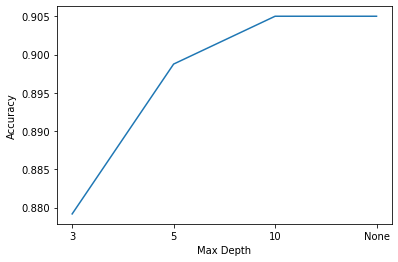

In [13]:
# plotting mean accuracy vs max depth 
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
xticks = ['3', '5', '10', 'None']
plt.plot(xticks, Scores)

In [14]:
%%time
dt_clf = DecisionTreeClassifier(max_depth=max_dep, random_state=0)
dt_clf.fit(X_train_val, y_train_val)
accuracy = cross_val_score(dt_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')

Wall time: 59.2 ms


In [15]:
%%time
dt_clf = DecisionTreeClassifier(max_depth=None, random_state=0)
dt_clf.fit(X_train_val, y_train_val)
accuracy = cross_val_score(dt_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')

Wall time: 62.5 ms


#### We observe that the maximum accuracy is achieved for maximum depth of 10 and None (nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples). Since, depth 10 is computaionally less complex and faster, than expanding until all leaves are pure , we consider the maximum depth as 10.

#### Visualizing Decision Tree

In [16]:
features = df.drop(['target'], axis = 1).columns.tolist()
target_names = ['Kama (1)', 'Rosa (2)', 'Canadian (3)']

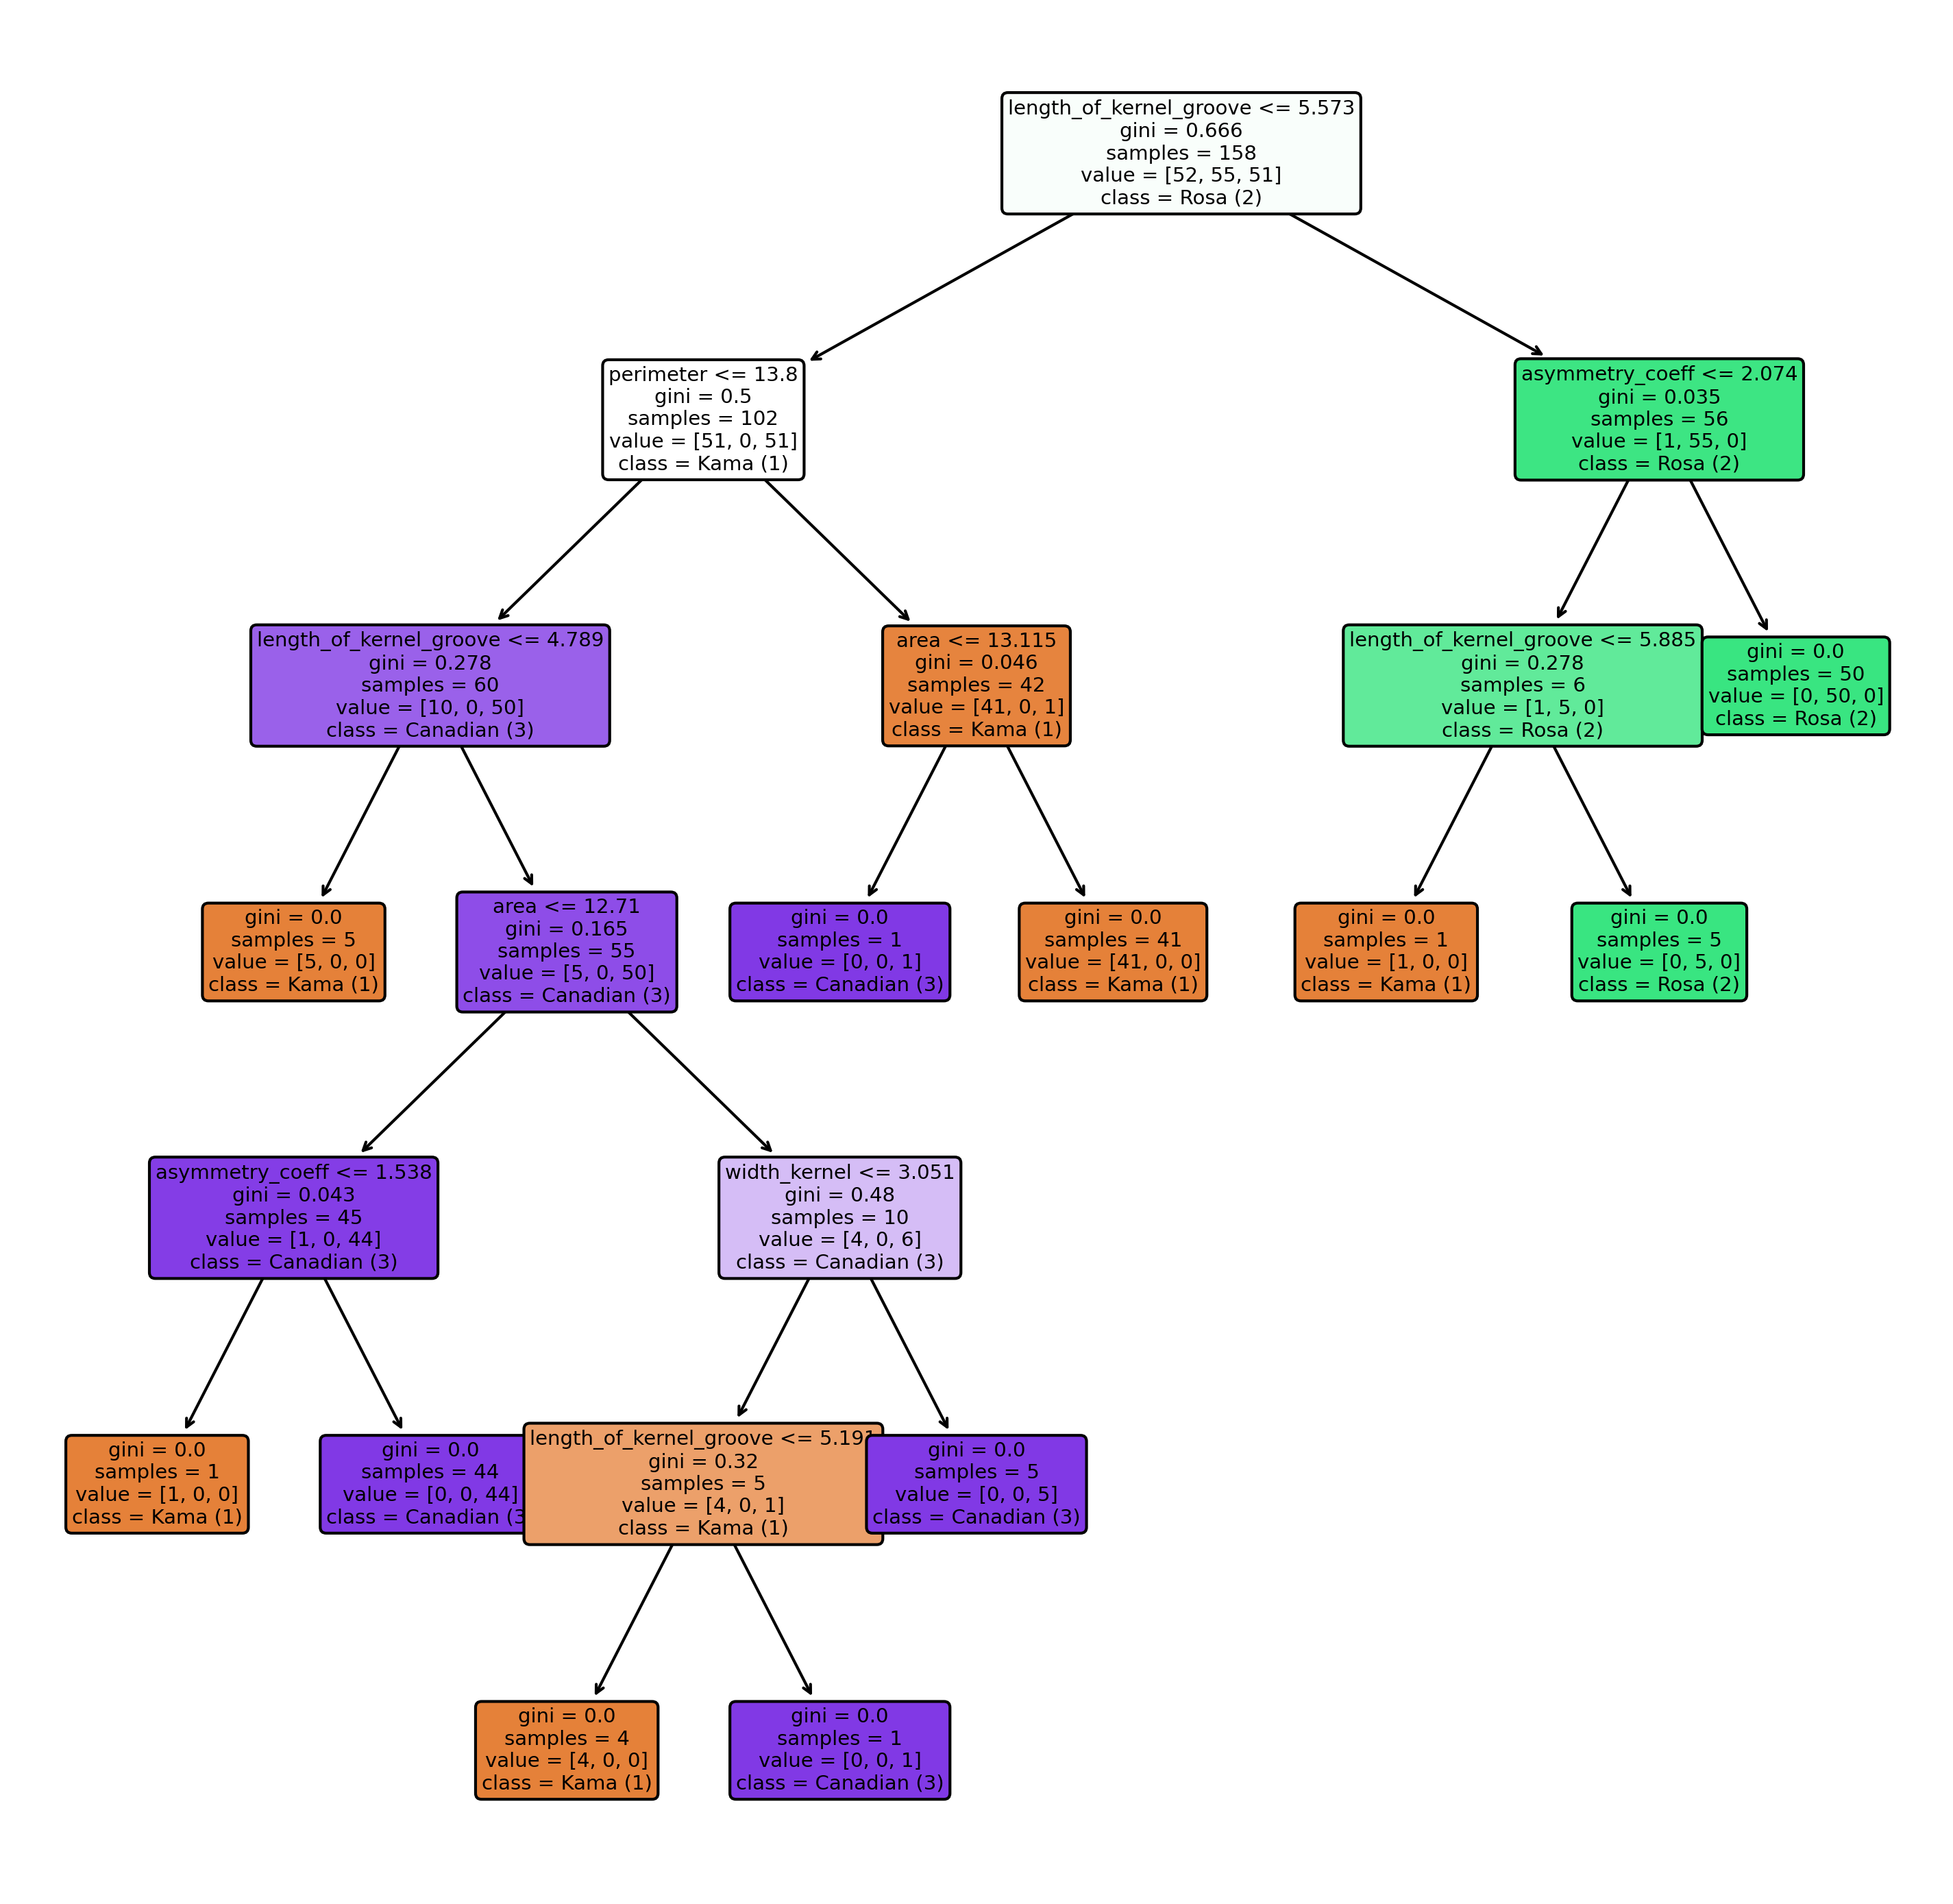

In [17]:
#visualizing the decision tree to analyse splitting rules
from sklearn import tree
dt_clf = DecisionTreeClassifier(random_state=0,max_depth=max_dep)
dt_clf.fit(X_train_val, y_train_val)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(dt_clf,feature_names=features,class_names=target_names,filled=True,fontsize=7, rounded = True) 
#plt.figure()
plt.show()

In [18]:
# importance of features in decision tree classification
importances = pd.DataFrame({'feature':features,'importance':np.round(dt_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

                   feature  importance
6  length_of_kernel_groove       0.600
1                perimeter       0.308
0                     area       0.041
4             width_kernel       0.030
5          asymmetry_coeff       0.021
2              compactness       0.000
3            length_kernel       0.000


#### From the decisiont tree plot, we observe:
- the feature 'length_of_kernel_groove' succesfully seperates Class 2 (Rosa) seeds from the dataset.The length_of_kernel_groove of Rosa seeds is larger when compared to both Kama and Canadian seeds and can be distinguished easily.
- further, 'perimeter' is able to distinguish  Class 1(Kama) from Class 3 (Canadian) seeds to a good extent. Kama seeds have an average perimeter greater than the Canadian seeds.
- We notice 'length_of_kernel_groove' feature is used multiple times indicating it's high classification capability.
- the feature 'length_kernel'and çompactness aren't used in the decision tree to distinguish data. 

In [19]:
# applying the best value of max depth on test set
dt_clf = DecisionTreeClassifier(max_depth=max_dep, random_state=0)
dt_clf.fit(X_train_val, y_train_val)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.9
f-score: 0.902136752136752


# Random Forest

In [20]:
# find best value for max depth & number of trees parameters using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None],
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [21]:
# using cross validation on train set to fine tune the max depth & number of trees parameters 
max_depth = [3, 5, 10, None]
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_dep=0
max_trees=0  
for k in max_depth:
    for n in number_of_trees:
        rf_clf = RandomForestClassifier(max_depth=k, n_estimators=n, random_state=0)
        rf_clf.fit(X_train_val, y_train_val)
        print(k, n)
        accuracy = cross_val_score(rf_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
        print(accuracy.mean())
        Scores.append(accuracy.mean())
        if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            max_dep=k
            max_trees=n
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 
print('The best value of number of trees is ', max_trees) 

3 5
0.8916666666666666
3 10
0.8920833333333335
3 50
0.9112500000000001
3 150
0.8920833333333335
3 200
0.8983333333333334
5 5
0.9112500000000001
5 10
0.93
5 50
0.9112500000000001
5 150
0.9108333333333334
5 200
0.9045833333333334
10 5
0.905
10 10
0.9241666666666667
10 50
0.9116666666666667
10 150
0.905
10 200
0.9112500000000001
None 5
0.905
None 10
0.9241666666666667
None 50
0.9116666666666667
None 150
0.905
None 200
0.9112500000000001
The maximum accuracy value is  0.93
The best value of maximum depth is  5
The best value of number of trees is  10


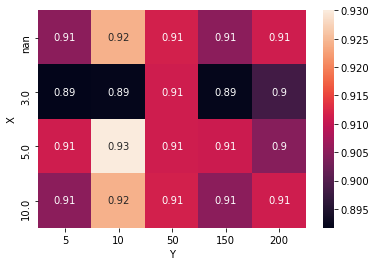

In [22]:
# heat plot - mean accuracies for different values of number of trees and max depth
max_depth = [3,3,3,3,3, 5,5,5,5,5, 10,10,10,10,10, None,None,None,None,None]
number_of_trees = [5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200]
data = pd.DataFrame({'X':max_depth, 'Y': number_of_trees, 'Z': Scores})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted,annot=True)
plt.show()

#### We observe that the maximum accuracy is achieved for maximum depth 5, and number of trees 10.

In [23]:
%%time
# applying the best value of depth and number of trees on the test set
rf_clf = RandomForestClassifier(max_depth=max_dep, n_estimators=max_trees, random_state=0)
rf_clf.fit(X_train_val, y_train_val)
y_pred = rf_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.9
f-score: 0.902136752136752
Wall time: 33.9 ms


# Gradient Tree Boosting

In [24]:
# find best value for number of trees parameter using gridsearchcv
param_grid = {
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'n_estimators': 150}

In [25]:
# using cross validation on train set to fine tune the number of trees parameter
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_trees=0
for k in number_of_trees:
    gt_clf = GradientBoostingClassifier(n_estimators=k, random_state=0)
    gt_clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(gt_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_trees=k
print('The maximum accuracy value is ', max_acc)
print('The best value of number of trees is ', max_trees) 

0.9112500000000001
0.9175000000000001
0.9245833333333333
0.9308333333333334
0.9308333333333334
The maximum accuracy value is  0.9308333333333334
The best value of number of trees is  150


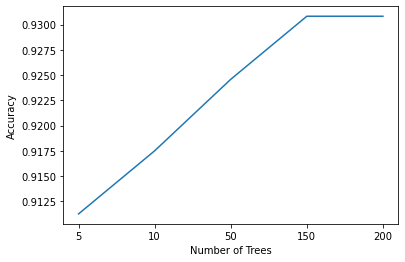

In [26]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
xticks = ['5', '10', '50', '150', '200']
plt.plot(xticks, Scores)

#### We observe maximum accuracy for both 150 and 200 trees. But 150 trees model will be less computationally complex and faster than 200 trees. Hence, selecting 150 number of trees.

In [27]:
# applying the best value of number of trees on test set

In [28]:
%%time
gt_clf = GradientBoostingClassifier(n_estimators=max_trees, random_state=0)
gt_clf.fit(X_train_val, y_train_val)
y_pred = gt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.95
f-score: 0.9484126984126985
Wall time: 391 ms


In [29]:
%%time
gt_clf = GradientBoostingClassifier(n_estimators=200, random_state=0)
gt_clf.fit(X_train_val, y_train_val)
y_pred = gt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.95
f-score: 0.9484126984126985
Wall time: 486 ms


#### we observe though the model with both 150 and 200 trees produce similar accuracy score, the complexity and computation time for 150 trees will be less than 200. Hence, Gradient Bossting with 150 trees works best. 

# Question 2 - Naive Bayes (Unprocessed)

In [30]:
from sklearn.naive_bayes import GaussianNB

# find best value for var_smoothing parameter using gridsearchcv
param_grid = {
    'var_smoothing'  :[1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
       }
       
tree = GaussianNB()
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'var_smoothing': 0.001}

In [31]:
# using cross validation on train set to fine tune the var_smoothing parameter
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
Scores = []
max_acc=0
best_var=0
for var in var_smoothing:
    print(var)
    gnb = GaussianNB(var_smoothing=var)
    gnb.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(gnb, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            best_var=var
print('The maximum accuracy value is ', max_acc)
print('The best value of var_smoothing is ', best_var)

1e-10
0.905
1e-09
0.905
1e-05
0.905
0.001
0.9175000000000001
0.1
0.8983333333333334
The maximum accuracy value is  0.9175000000000001
The best value of var_smoothing is  0.001


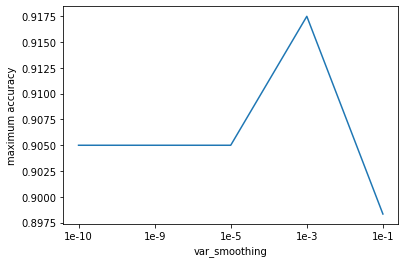

In [32]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("var_smoothing")
plt.ylabel("maximum accuracy")
xticks = ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']
plt.plot(xticks, Scores)

#### We observe maximum accuracy for variance smoothing parameter 1e-3 (0.001). Smoothing allows Naive Bayes to better handle cases where evidence has never appeared for a particular category i.e. the problem of zero probability.  Var_smoothing is the portion of the largest variance of all features that is added to  variances for calculation stability i.e  if the predicted value is too small. We observe the accuracy is same as the var_smoothing parameter increases from 1e-10, 1e-9, 1e-5, with peak accuracy at 1e-3, and further decreasing at 1e-1

In [33]:
%%time
# applying the best value of var_smoothing on test set
gnb = GaussianNB(var_smoothing=best_var)
gnb.fit(X_train_val, y_train_val)
gnb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.95
f-score: 0.9484126984126985
Wall time: 12 ms


# Data Preprocessing

### Data Analysis and Feature Selection

In [34]:
# read data from file
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [35]:
# setting column names
df.columns = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']

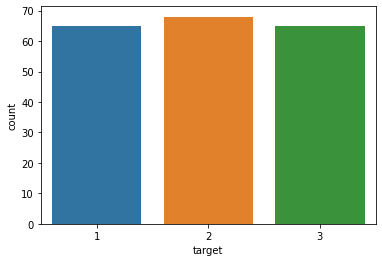

In [36]:
sns.countplot(x='target',data=df)

#### It's always a good practice to work with a dataset where the target classes are of approximately equal size. We see the dataset is well balanced

In [37]:
df.corr()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
area,1.000000,0.994449,0.609904,0.951175,0.970978,-0.222804,0.863362,-0.341249
perimeter,0.994449,1.000000,0.531880,0.972955,0.945499,-0.210643,0.890382,-0.322321
compactness,0.609904,0.531880,1.000000,0.374069,0.762191,-0.330206,0.227129,-0.541270
length_kernel,0.951175,0.972955,0.374069,1.000000,0.862704,-0.168791,0.933248,-0.248737
width_kernel,0.970978,0.945499,0.762191,0.862704,1.000000,-0.253155,0.748826,-0.422823
asymmetry_coeff,-0.222804,-0.210643,-0.330206,-0.168791,-0.253155,1.000000,-0.005443,0.571351
length_of_kernel_groove,0.863362,0.890382,0.227129,0.933248,0.748826,-0.005443,1.000000,0.033120
target,-0.341249,-0.322321,-0.541270,-0.248737,-0.422823,0.571351,0.033120,1.000000


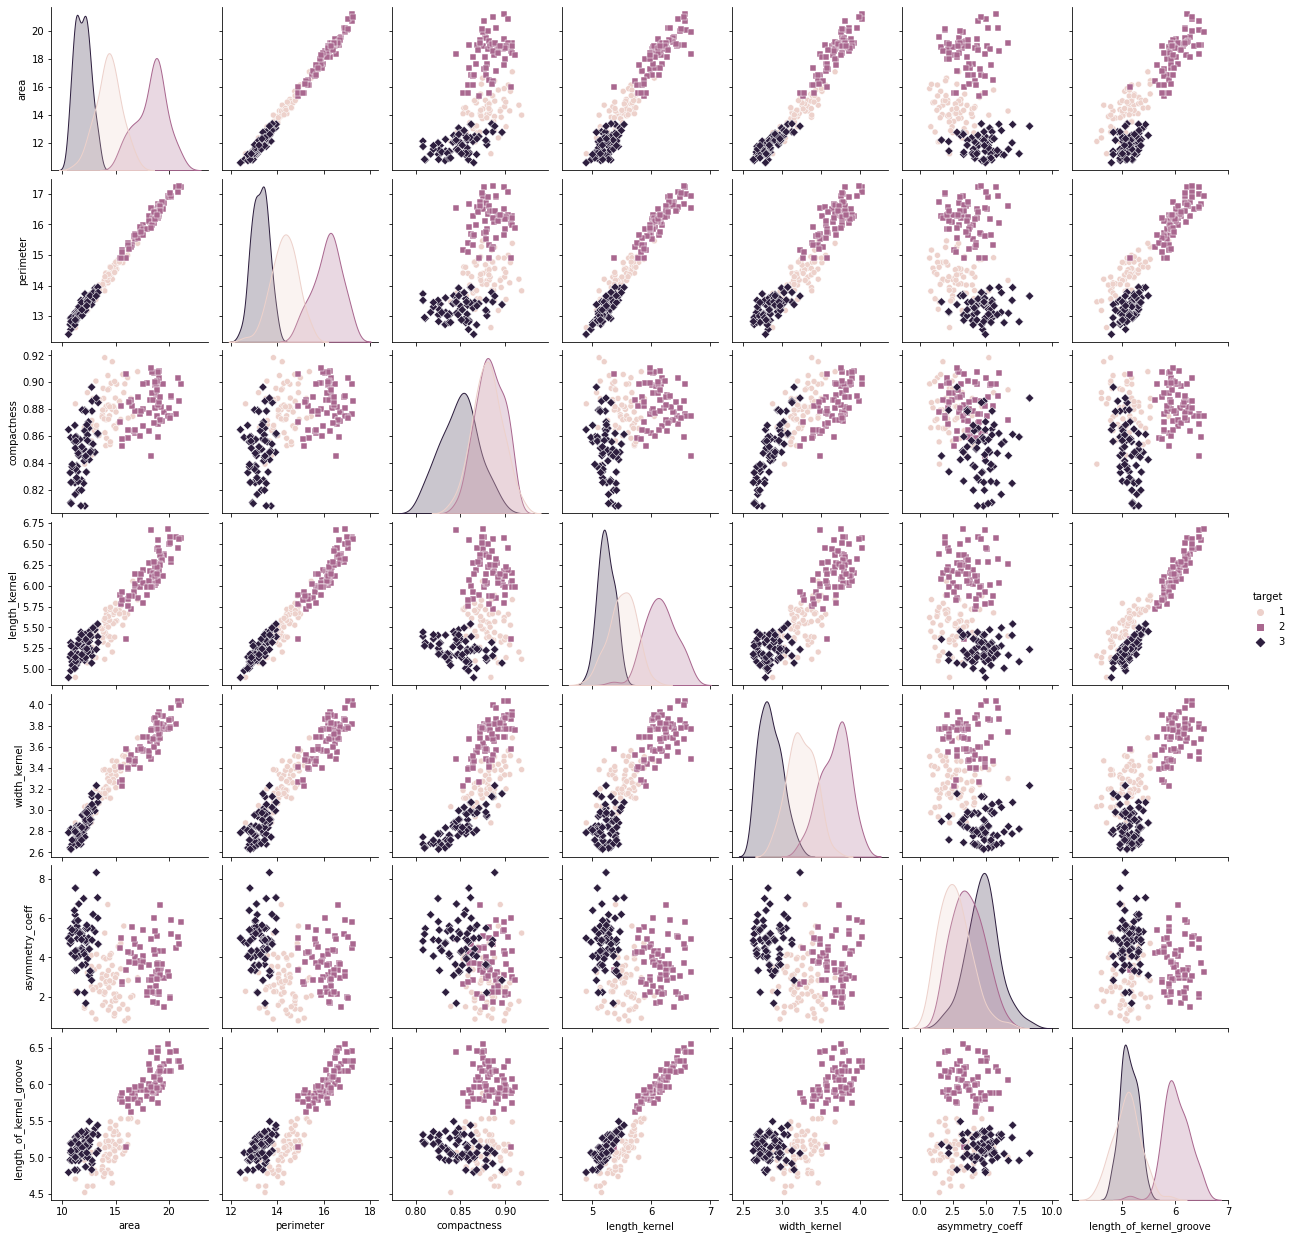

In [38]:
# pairplot
sns.pairplot(df, hue='target',markers=['o', 's', 'D'])

### From the "pair plot" visualization, we observe that :

- perimeter and area are most positively correlated as we see a linear increase between the features. The scatter plot aligns with a linear line function.

- we observe a similar pattern with length_kernel and perimeter where there is linear positive correlation. 

- In all the plots, class 2 (Rosa) is easily distinguishable and can be identified irrespective of features. By using length_of_kernel_groove, we can distinctly seperate class 2 (Rosa).

- For Class 1 (Kama) and 3 (Canadian), we see that the plots are mostly overlapping.

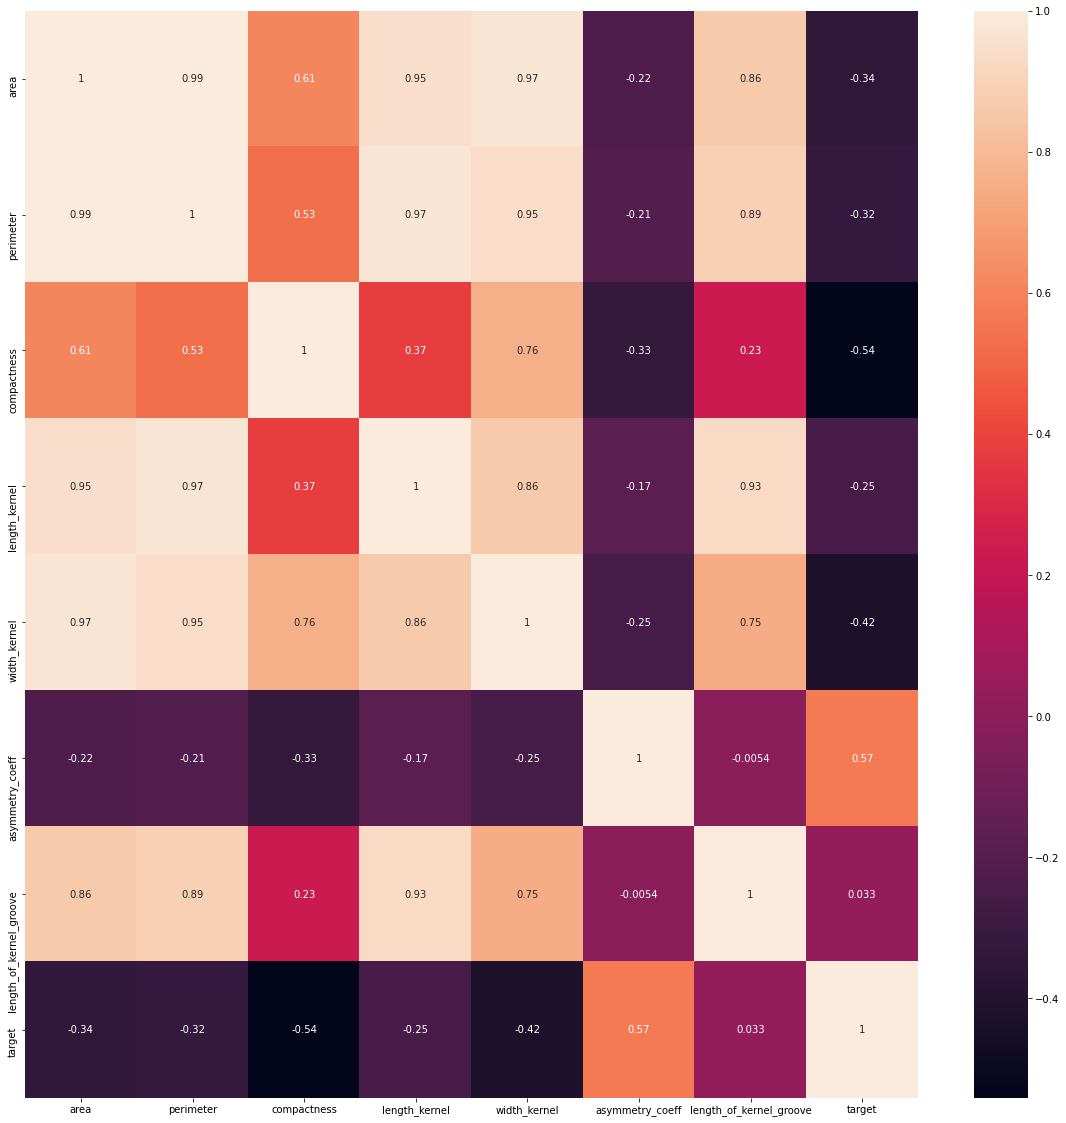

In [39]:
# plotting correlation coeeficients using heat map
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
heart_heat_map=sns.heatmap(df[top_corr_features].corr(),annot=True)

### From the "heat map" visualization, we observe that:

- there is high positive correlation between area, perimeter,length_kernel,width_kernel,length_of_kernel_groove.

- there is less correlation between compactness , assymmetric_coeff with other features.

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_cols = df.columns.drop('target')
X = df.drop(['target'], axis=1)
y = df['target']

# Keep 5 features
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(X, y)
X_new
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=X.index, 
                                 columns=feature_cols)
selected_features.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove
0,14.88,14.57,0.0,5.554,3.333,0.0,4.956
1,14.29,14.09,0.0,5.291,3.337,0.0,4.825
2,13.84,13.94,0.0,5.324,3.379,0.0,4.805
3,16.14,14.99,0.0,5.658,3.562,0.0,5.175
4,14.38,14.21,0.0,5.386,3.312,0.0,4.956


#### As observed from Pair plots, Heatmap and the Feature selection, we select best 5 features to model the classifiers:
- area
- perimeter
- length_kernel
- width_kernel
- length_of_kernel_groove


In [41]:
df = df.drop(['compactness','asymmetry_coeff'], axis=1)

### Outlier detection and Removal 

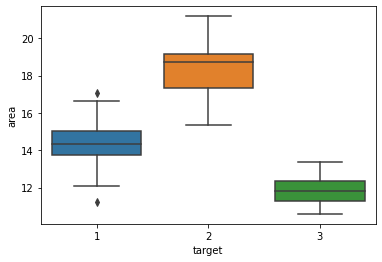

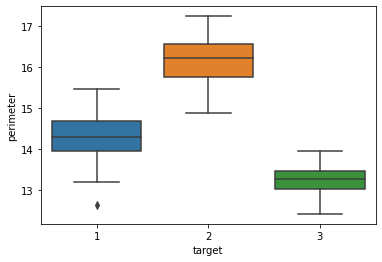

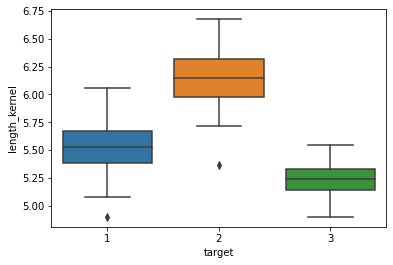

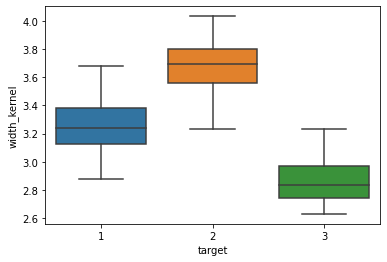

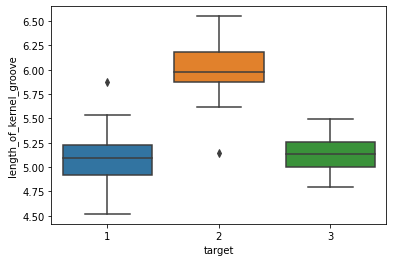

In [42]:
# outlier detection using boxplot
cols = df.columns.drop('target')
for column in df[cols]:
    plt.figure()
    ax = sns.boxplot(x='target', y=column, data=df)
    plt.show()

#### We observe outliers in 'area','perimeter','length_kernel','length_of_kernel_groove' which can be replaced with feature mean.

In [43]:
# outlier detection using IQR
for column in df[cols]:
    for target in df['target'].unique():    
        q25 = df[column][df['target'] == target].quantile(0.25)
        q75 = df[column][df['target'] == target].quantile(0.75)
        iqr = q75 - q25
        print(target, '-', column.upper())
        print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
        
        # Calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        # Identify outliers
        df2 = pd.DataFrame(df[df['target'] == target][column])

        count = len(df2[df2[column] < lower].index)
        count += len(df2[df2[column] > upper].index)
        print('Identified outliers: ', count)

        # replacing outliers with NaN (Will be later replaced with feature mean)
        for index in df2[df2[column] < lower].index:
            df.loc[index, column] = np.nan
        for index in df2[df2[column] > upper].index:
            df.loc[index, column] = np.nan

1 - AREA
Percentiles: 25th = 13.740, 75th = 15.030, IQR = 1.290
Identified outliers:  2
2 - AREA
Percentiles: 25th = 17.350, 75th = 19.142, IQR = 1.792
Identified outliers:  0
3 - AREA
Percentiles: 25th = 11.270, 75th = 12.380, IQR = 1.110
Identified outliers:  0
1 - PERIMETER
Percentiles: 25th = 13.940, 75th = 14.680, IQR = 0.740
Identified outliers:  1
2 - PERIMETER
Percentiles: 25th = 15.753, 75th = 16.575, IQR = 0.822
Identified outliers:  0
3 - PERIMETER
Percentiles: 25th = 13.020, 75th = 13.470, IQR = 0.450
Identified outliers:  0
1 - LENGTH_KERNEL
Percentiles: 25th = 5.384, 75th = 5.674, IQR = 0.290
Identified outliers:  1
2 - LENGTH_KERNEL
Percentiles: 25th = 5.980, 75th = 6.322, IQR = 0.342
Identified outliers:  1
3 - LENGTH_KERNEL
Percentiles: 25th = 5.140, 75th = 5.333, IQR = 0.193
Identified outliers:  0
1 - WIDTH_KERNEL
Percentiles: 25th = 3.129, 75th = 3.379, IQR = 0.250
Identified outliers:  0
2 - WIDTH_KERNEL
Percentiles: 25th = 3.559, 75th = 3.803, IQR = 0.244
Identifi

In [44]:
# replacing NaN values with feature mean
for column in df[cols]:
    df[column].fillna(value=df[column].mean(), inplace=True)   

In [45]:
# Split processed dataset into train and test sets
X = df.drop(['target'], axis=1)
y = df['target']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization 

In [46]:
# # Standard Scalar Normalization
# sc = StandardScaler()
# sc.fit(X_train_val)
# X_train_val = sc.transform(X_train_val)
# X_test = sc.transform(X_test)

#### Standard scalar normalization was performed and was observed to not have any positive impact on the accuracy/performance. Normalization would not have major impact on the performance of a decision tree and tree ensemble models. It is generally useful, when solving a system of equations, least squares, etc, where there can be issues due to rounding errors. Decision trees are not sensitive to scaling, Hence normalization would not have any impact here.

# Processed Dataset

# Decision Tree

In [47]:
# find best value for max depth parameter using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None]
       }

tree = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 5}

In [48]:
# using cross validation on train set to fine tune the max depth parameter 
max_depth = [3, 5, 10, None]
Scores = []
max_acc=0
max_dep=0
for k in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=k, random_state=0)
    dt_clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(dt_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_dep=k
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 

0.9045833333333334
0.9108333333333334
0.9045833333333334
0.9045833333333334
The maximum accuracy value is  0.9108333333333334
The best value of maximum depth is  5


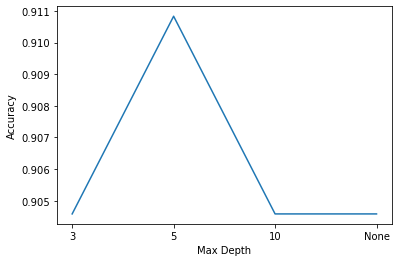

In [49]:
# plotting mean accuracy vs max depth 
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
xticks = ['3', '5', '10', 'None']
plt.plot(xticks, Scores)

#### We observe that the maximum accuracy is achieved for maximum depth of 5.

### Visualizing Decision Tree

In [50]:
features = df.drop(['target'], axis = 1).columns.tolist()
target_names = ['Kama (1)', 'Rosa (2)', 'Canadian (3)']

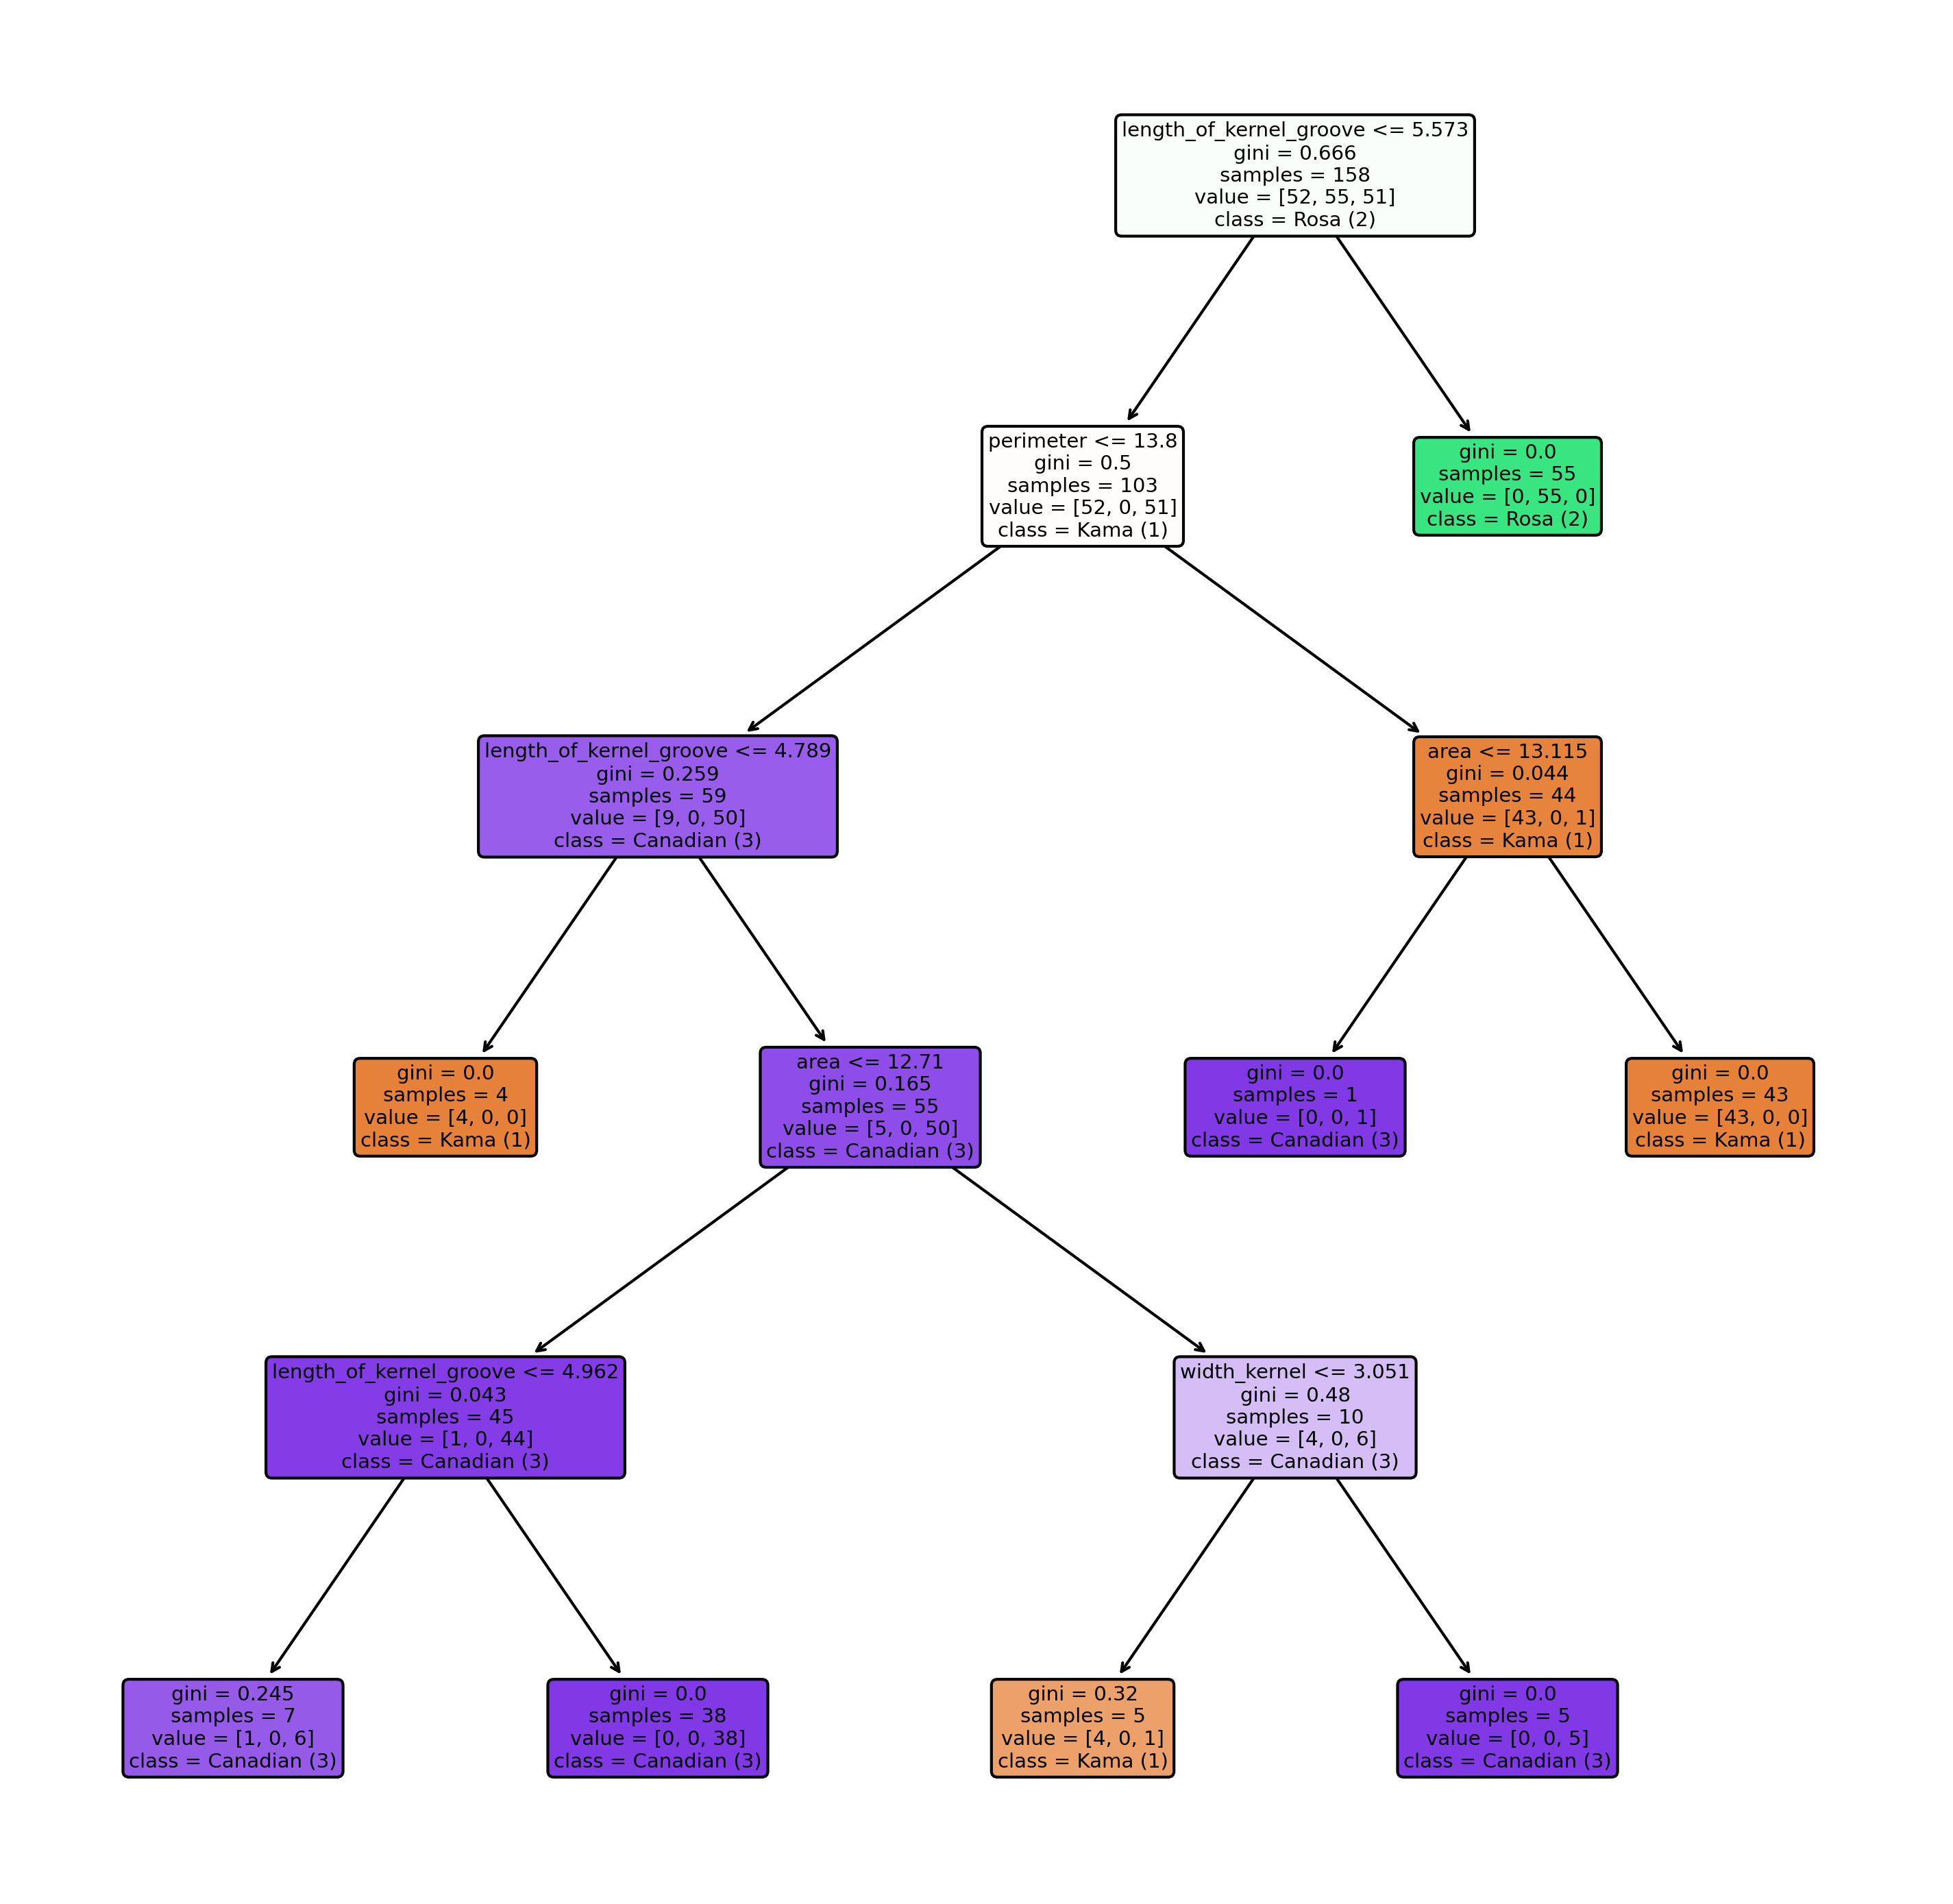

In [51]:
#visualizing the decision tree to analyse splitting rules
from sklearn import tree
dt_clf = DecisionTreeClassifier(random_state=0,max_depth=max_dep)
dt_clf.fit(X_train_val, y_train_val)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(dt_clf,feature_names=features,class_names=target_names,filled=True,fontsize=7, rounded = True) 
#plt.figure()
plt.show()

In [52]:
text_representation = tree.export_text(dt_clf,feature_names=features)
print(text_representation)

|--- length_of_kernel_groove <= 5.57
|   |--- perimeter <= 13.80
|   |   |--- length_of_kernel_groove <= 4.79
|   |   |   |--- class: 1
|   |   |--- length_of_kernel_groove >  4.79
|   |   |   |--- area <= 12.71
|   |   |   |   |--- length_of_kernel_groove <= 4.96
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- length_of_kernel_groove >  4.96
|   |   |   |   |   |--- class: 3
|   |   |   |--- area >  12.71
|   |   |   |   |--- width_kernel <= 3.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- width_kernel >  3.05
|   |   |   |   |   |--- class: 3
|   |--- perimeter >  13.80
|   |   |--- area <= 13.11
|   |   |   |--- class: 3
|   |   |--- area >  13.11
|   |   |   |--- class: 1
|--- length_of_kernel_groove >  5.57
|   |--- class: 2



In [53]:
# importance of features in decision tree classification
importances = pd.DataFrame({'feature':features,'importance':np.round(dt_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

                   feature  importance
4  length_of_kernel_groove       0.590
1                perimeter       0.336
0                     area       0.042
3             width_kernel       0.031
2            length_kernel       0.000


#### From the decisiont tree plot, we observe:
- the feature 'length_of_kernel_groove' succesfully seperates Class 2 (Rosa) seeds from the dataset.The length_of_kernel_groove of Rosa seeds is larger when compared to both Kama and Canadian seeds and can be distinguished easily.
- further, 'perimeter' is able to distinguish  Class 1(Kama) from Class 3 (Canadian) seeds to a good extent. Kama seeds have an average perimeter greater than the Canadian seeds.
- We notice 'length_of_kernel_groove' feature is used multiple times indicating it's high classification capability.
- the feature 'length_kernel' isn't used in the decision tree to distinguish data.

In [54]:
%%time
# applying the best value of max depth on test set
dt_clf = DecisionTreeClassifier(max_depth=max_dep, random_state=0)
dt_clf.fit(X_train_val, y_train_val)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.925
f-score: 0.9265428824049513
Wall time: 0 ns


# Random Forest

In [55]:
# find best value for max depth & number of trees parameters using gridsearchcv
param_grid = {
   'max_depth': [3, 5, 10, None],
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [56]:
# using cross validation on train set to fine tune the max depth & number of trees parameters 
max_depth = [3, 5, 10, None]
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_dep=0
max_trees=0  
for k in max_depth:
    for n in number_of_trees:
        rf_clf = RandomForestClassifier(max_depth=k, n_estimators=n, random_state=0)
        rf_clf.fit(X_train_val, y_train_val)
        print(k, n)
        accuracy = cross_val_score(rf_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
        print(accuracy.mean())
        Scores.append(accuracy.mean())
        if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            max_dep=k
            max_trees=n
print('The maximum accuracy value is ', max_acc)
print('The best value of maximum depth is ', max_dep) 
print('The best value of number of trees is ', max_trees) 

3 5
0.9104166666666668
3 10
0.9041666666666668
3 50
0.9041666666666668
3 150
0.9170833333333335
3 200
0.9170833333333335
5 5
0.8912500000000001
5 10
0.9104166666666668
5 50
0.9295833333333334
5 150
0.9162500000000001
5 200
0.9162500000000001
10 5
0.8912500000000001
10 10
0.9045833333333334
10 50
0.9233333333333335
10 150
0.9162500000000001
10 200
0.9229166666666668
None 5
0.8912500000000001
None 10
0.9045833333333334
None 50
0.9233333333333335
None 150
0.9162500000000001
None 200
0.9229166666666668
The maximum accuracy value is  0.9295833333333334
The best value of maximum depth is  5
The best value of number of trees is  50


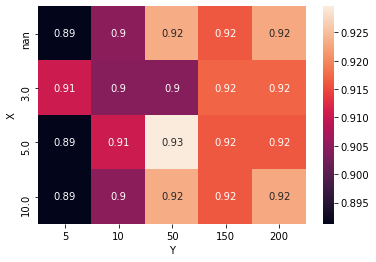

In [57]:
# heat plot - mean accuracies for different values of number of trees and max depth
max_depth = [3,3,3,3,3, 5,5,5,5,5, 10,10,10,10,10, None,None,None,None,None]
number_of_trees = [5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200]
data = pd.DataFrame({'X':max_depth, 'Y': number_of_trees, 'Z': Scores})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted,annot=True)
plt.show()

#### We observe that the maximum accuracy is achieved for maximum depth of 5 and number of trees 50

In [58]:
%%time
# applying the best value of depth and number of trees on the test set
rf_clf = RandomForestClassifier(max_depth=max_dep, n_estimators=max_trees, random_state=0)
rf_clf.fit(X_train_val, y_train_val)
y_pred = rf_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.925
f-score: 0.9265428824049513
Wall time: 84.9 ms


# Gradient Tree Boosting

In [59]:
# find best value for number of trees parameter using gridsearchcv
param_grid = {
    'n_estimators' :[5, 10, 50, 150, 200]
       }
       
tree = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'n_estimators': 150}

In [60]:
# using cross validation on train set to fine tune the number of trees parameter
number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc=0
max_trees=0
for k in number_of_trees:
    gt_clf = GradientBoostingClassifier(n_estimators=k, random_state=0)
    gt_clf.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(gt_clf, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
        max_acc=accuracy.mean()
        max_trees=k
print('The maximum accuracy value is ', max_acc)
print('The best value of number of trees is ', max_trees) 

0.9175000000000001
0.93
0.93625
0.9425000000000001
0.9425000000000001
The maximum accuracy value is  0.9425000000000001
The best value of number of trees is  150


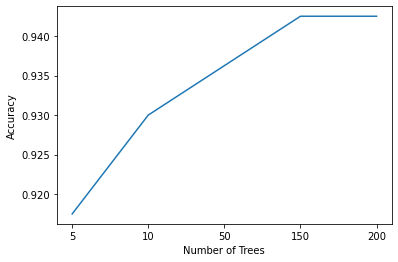

In [61]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
xticks = ['5', '10', '50', '150', '200']
plt.plot(xticks, Scores)

#### we observe though the model with both 150 and 200 trees produce similar accuracy score, the complexity and computation time for 150 trees will be less than 200. Hence, Gradient Bossting with 150 trees works best. 

In [62]:
%%time
# applying the best value of number of trees on test set
gt_clf = GradientBoostingClassifier(n_estimators=max_trees, random_state=0)
gt_clf.fit(X_train_val, y_train_val)
y_pred = gt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score)

Accuracy:  0.925
f-score: 0.9265428824049513
Wall time: 387 ms


# Question 2 - Naive Bayes (Processed Dataset)

In [63]:
from sklearn.naive_bayes import GaussianNB

# find best value for var_smoothing parameter using gridsearchcv
param_grid = {
    'var_smoothing'  :[1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
       }
       
tree = GaussianNB()
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train_val, y_train_val)
grid_search.best_params_

{'var_smoothing': 1e-10}

In [64]:
# using cross validation on train set to fine tune the var_smoothing parameter
var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
Scores = []
max_acc=0
best_var=0
for var in var_smoothing:
    print(var)
    gnb = GaussianNB(var_smoothing=var)
    gnb.fit(X_train_val, y_train_val)
    accuracy = cross_val_score(gnb, X_train_val, y_train_val, cv=10, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
            max_acc=accuracy.mean()
            best_var=var
print('The maximum accuracy value is ', max_acc)
print('The best value of var_smoothing is ', best_var)

1e-10
0.9045833333333334
1e-09
0.9045833333333334
1e-05
0.9045833333333334
0.001
0.9045833333333334
0.1
0.8983333333333334
The maximum accuracy value is  0.9045833333333334
The best value of var_smoothing is  1e-10


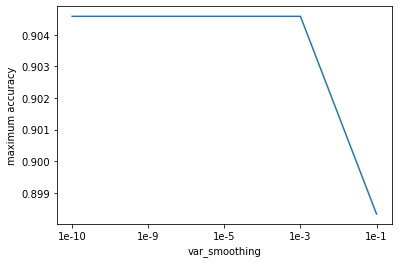

In [65]:
# plotting the mean accuracy versus the number of estimators
plt.xlabel("var_smoothing")
plt.ylabel("maximum accuracy")
xticks = ['1e-10', '1e-9', '1e-5', '1e-3', '1e-1']
plt.plot(xticks, Scores)

#### We observe same maximum accuracy for variance smoothing parameters 1e-10, 1e-9, 1e-5, 1e-3. Smoothing allows Naive Bayes to better handle cases where evidence has never appeared for a particular category i.e. the problem of zero probability.  Var_smoothing is the portion of the largest variance of all features that is added to  variances for calculation stability i.e  if the predicted value is too small. The smoothing parameter doesn't have a major impact here.This can be attributed to the type of the features , as all the features are numeric in the dataset.

In [66]:
%%time
# applying the best value of var_smoothing on test set
gnb = GaussianNB(var_smoothing=best_var)
gnb.fit(X_train_val, y_train_val)
gnb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
f_score = f1_score(y_test, y_pred, average = 'macro')
print('f-score:', f_score) 

Accuracy:  0.925
f-score: 0.9265428824049513
Wall time: 7.98 ms


### Impact of preprocessing:
- we observed pre processing of the data (normalization , feature selection etc.) didn't improve the performance of the Tree based classifiers significantly. In fact to the contrary, the accuracy of the ensembe methods were observed to have gone down by a small amount. 

### NB learned Parameters theta_ (mean) and sigma_ (variance) 

In [67]:
X_train_val.columns

Index(['area', 'perimeter', 'length_kernel', 'width_kernel',
       'length_of_kernel_groove'],
      dtype='object')

In [68]:
# mean ['area','perimeter','length_kernel','width_kernel','length_of_kernel_groove']
gnb.theta_

array([[14.31229984, 14.30681863,  5.51372596,  3.24076923,  5.07336077],
       [18.47509091, 16.20672727,  6.18145455,  3.68961818,  6.04552727],
       [11.92980392, 13.26666667,  5.23572549,  2.86598039,  5.11607843]])

In [69]:
# variance ['area','perimeter','length_kernel','width_kernel','length_of_kernel_groove']
gnb.sigma_

array([[1.1553264 , 0.2751547 , 0.0466526 , 0.03198691, 0.05833384],
       [1.91794499, 0.33493838, 0.05771701, 0.03350129, 0.04885654],
       [0.47804898, 0.11106144, 0.01841267, 0.01965065, 0.02661811]])

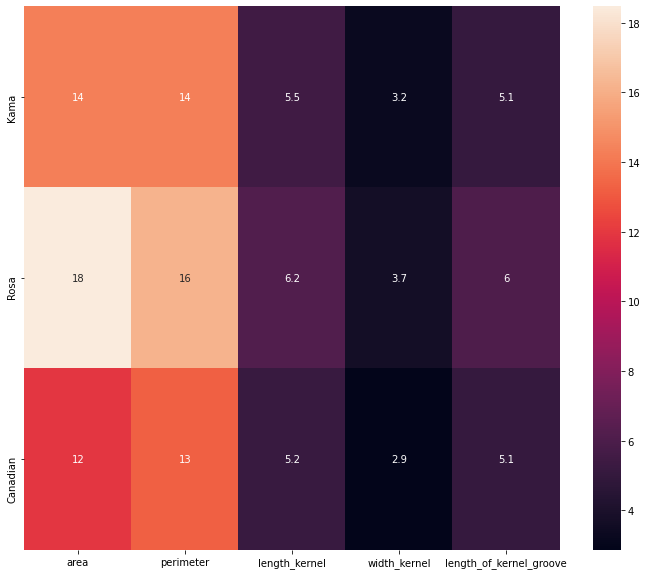

In [70]:
x_axis_labels = ['area','perimeter','length_kernel','width_kernel','length_of_kernel_groove'] # labels for x-axis
y_axis_labels = ['Kama','Rosa','Canadian'] # labels for y-axis

# create seabvorn heatmap with required labels
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(gnb.theta_, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)

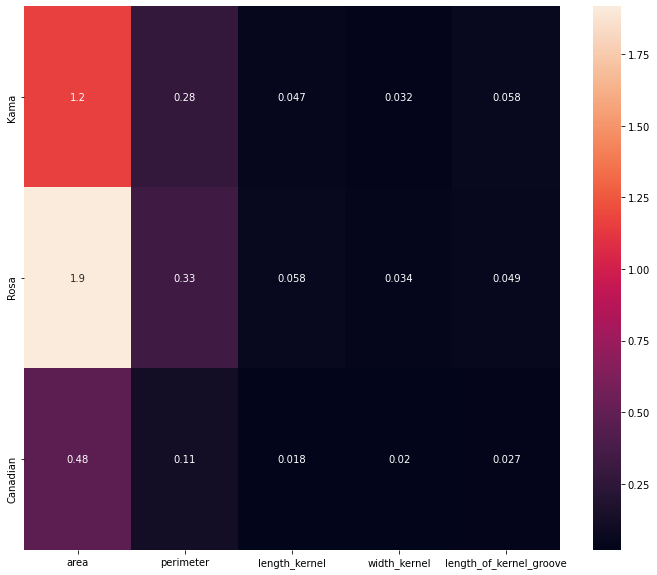

In [71]:
# create seabvorn heatmap with required labels
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(gnb.sigma_, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)

# [CM6]

### Seeds Dataset :
In Decision tree, we observe maximum accuracy of 91% at maximum depth of 5 on the training set with 10 fold cross validation. The model gives an accuracy of 92.65% on the test set. 

In Random Forest, we observe maximum accuracy of 92.95% at the maximum depth of 5 and 50 independent tress on the training set with 10 fold cross validation. The model also gives an accuracy of 92.65% on the test set.

In Gradient Tree Boosting, we observe maximum accuracy of 94.25% with 150 tress on the training set with 10 fold cross validation. The model also gives an accuracy of 92.65% on the test set.

In Naive Bayes Classifier, we observe maximum accuracy of 90.4% with a variance smoothing parameter 1e-10. The model gives an accuracy of 92.5% on the test set. We notice that the accuracy for variance smoothing parameters 1e-10, 1e-9, 1e-5, 1e-3 is same and then decreases for 1e-1. Laplace smoothing is a smoothing technique that helps tackle the problem of zero probability in the Naïve Bayes machine learning algorithm. We see that the smoothing parameter doesn't have a major impact here as all the features are numeric in the dataset.

Comparing the classifiers, we notice that Decision tree approaches has better performance on the training set than Naive Bayes, But we observe similar performance on the test set. This can be attributed to small size of the dataset. Decision tree is a discriminative model, whereas Naive bayes is a generative model. Also, Naive bayes is computationally faster when compared to Decision tree approaches.

#### From the NB learned parameters of 'theta_' (mean) and 'sigma_' (variance) ,  and comparing this to the single Decision Tree model, We observe:

- A feature can be considered good seperator, if the mean of the feature for disctinct classes are far apart, and if the variance of the features are low indicating the values are closer to te mean.

- the learned parameter 'theta_' (mean) of feature 'length_of_kernel_groove' is similar for Class 1(Kama) & 3(Canadian) (5.1) and different from Class 2 (Rosa) (6). Also 'sigma_' (variance) is very low for this feature indicating all the values are spaced close to the mean. Thus this feature 'length_of_kernel_groove' can be used to distinguish Class 2 (Rosa) effectively.   This is observed in the decision tree classifier aswell, where the splitting rule 'length_of_kernel_groove' <= 5.57 successfully seperates Class 2 (Rosa) from rest of the dataset. 

- Similarly the parameter 'theta_' (mean) of feature 'perimeter' is relatively different for Classes 1(Kama) & 3(Canadian). Also 'sigma_' (variance) is low for this feature indicating all the values are spaced close to the mean. Thus this feature can distinguish between Classes 1(Kama) & 3(Canadian) considerably. This is observed in the decision tree classifier aswell, where the splitting rule 'perimeter' <= 13.80 seperates Classes 1(Kama) & 3(Canadian) to a good extent.

- Similarly the learned parameters of feature 'area' and 'width_kernel' are relatively different for Classes 1(Kama) & 3(Canadian). Thus these feature can distinguish between Classes 1(Kama) & 3(Canadian) decently. This is observed in the decision tree classifier aswell, where the features are used to seperate Classes 1(Kama) & 3(Canadian).